# ASSIGNMENT2-Computer Vision
# MUHAMMED SHIFAN P
# B180501CS

### 1. Take a real image( Your own color photograph of size 256x256) and do the following

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

In [2]:
# I am basically using OpenCv library to accept input and Matplotlib library to output it
# OpenCv is following BGR
# Matplotlib is following RGB
# So we need to convert to RGB format while outputing the image 

def show_image(img):#used to output Gray Scale image
    rgb=cv.cvtColor(img,cv.COLOR_GRAY2RGB)
    plt.imshow(rgb)
    plt.show()

def show_image_BGR(img):#used to output normal image
    rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()

In [3]:
def convolve_2D(image, kernel):
    kernel=np.flip(kernel, 0)
    kernel=np.flip(kernel, -1)
    return correlation_2d(image, kernel)
def correlation_2d(image, kernel):
    # x and m are no of rows
    # y and n are no of columns
    m, n = kernel.shape
    x, y = image.shape
    
    x_final = x + 2*m - 2
    y_final = y + 2*n - 2
    image_final = np.zeros((x_final,y_final),dtype='uint8')#for image
    
    for i in range(x_final):
        for j in range(y_final):
            if(i>=m-1 and i<x_final-m+1 and j>=n-1 and j<y_final-n+1):
                image_final[i,j]=image[i-m+1,j-n+1]
                
    for i in range(x_final):
        for j in range(y_final):
            if(i+m<=x_final and j+n<=y_final):
                image_final[i,j] = np.sum(image_final[i:i+m, j:j+n]*kernel)
                
    x_out=x_final-m+1
    y_out=y_final-n+1
    image_out = np.zeros((x_out,y_out),dtype='uint8')#for image
    
    for i in range(x_out):
        for j in range(y_out):
            image_out[i,j]=image_final[i,j]
            
    return image_out

In [4]:
img=cv.imread(r"D:\NIT Calicut\Sem 7\Computer Vision\My Photo.jpg")

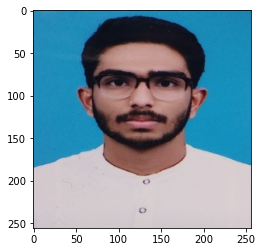

In [5]:
show_image_BGR(img)

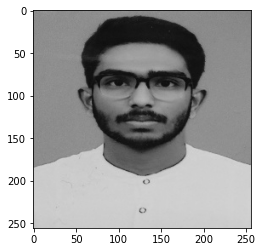

In [6]:
gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
show_image(gray)

### (i)Low pass filtering

In [7]:
mask=[[1,1,1],[1,1,1],[1,1,1]]
mask=np.array(mask)
mask=mask/9
print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


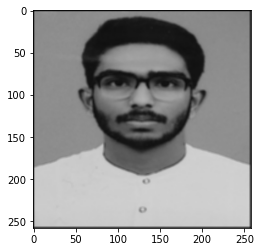

In [8]:
show_image(convolve_2D(gray,mask))

In [9]:
mask=[[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]]
mask=np.array(mask)
mask=mask/25
print(mask)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


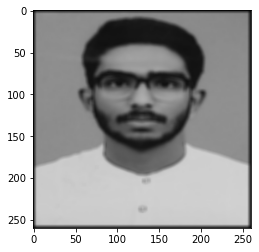

In [10]:
show_image(convolve_2D(gray,mask))

### (ii) Sobel operator 3*3

In [11]:
mask=[[-1,0,1],[-2,0,2],[-1,0,1]]
mask=np.array(mask)
print(mask)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


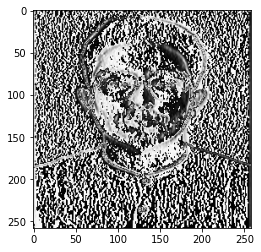

In [12]:
x_dir=convolve_2D(gray,mask)
show_image(x_dir)

In [13]:
mask=[[-1,-2,-1],[0,0,0],[1,2,1]]
mask=np.array(mask)
print(mask)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


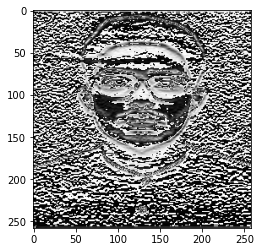

In [14]:
y_dir=convolve_2D(gray,mask)
show_image(y_dir)

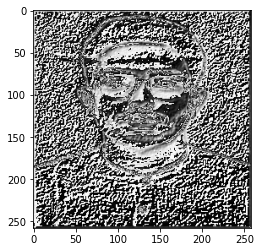

In [15]:
show_image((x_dir+y_dir))

### (ii) Sobel operator 5*5

In [16]:
mask=[[-1,-2,0,2,1],[-2,-3,0,3,2],[-3,-5,0,5,3],[-2,-3,0,3,2],[-1,-2,0,2,1]]
mask=np.array(mask)
print(mask)

[[-1 -2  0  2  1]
 [-2 -3  0  3  2]
 [-3 -5  0  5  3]
 [-2 -3  0  3  2]
 [-1 -2  0  2  1]]


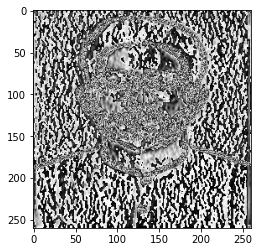

In [17]:
x_dir=convolve_2D(gray,mask)
show_image(x_dir)

In [18]:
mask=[[1,2,3,2,1],[2,3,5,3,2],[0,0,0,0,0],[-2,-3,-5,-3,-2],[-1,-2,-3,-2,-1]]
mask=np.array(mask)
print(mask)

[[ 1  2  3  2  1]
 [ 2  3  5  3  2]
 [ 0  0  0  0  0]
 [-2 -3 -5 -3 -2]
 [-1 -2 -3 -2 -1]]


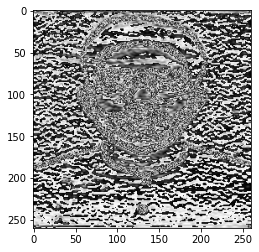

In [19]:
y_dir=convolve_2D(gray,mask)
show_image(y_dir)

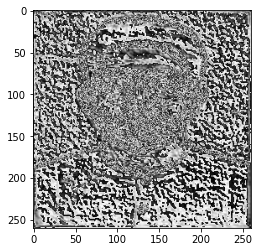

In [20]:
show_image((x_dir+y_dir))

### (iii) Laplacian operator 3x3

In [21]:
mask=[[1,1,1],[1,-8,1],[1,1,1]]
mask=np.array(mask)
print(mask)

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


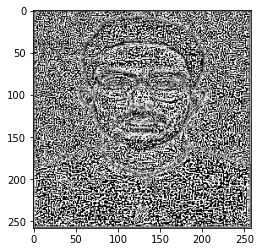

In [22]:
show_image(convolve_2D(gray,mask))

### (iii) Laplacian operator 5x5

In [23]:
mask=[[1,1,1,1,1],[1,1,1,1,1],[1,1,-24,1,1],[1,1,1,1,1],[1,1,1,1,1]]
mask=np.array(mask)
print(mask)

[[  1   1   1   1   1]
 [  1   1   1   1   1]
 [  1   1 -24   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1   1]]


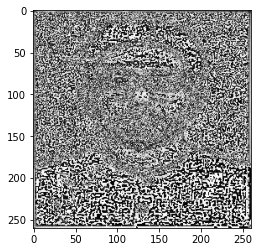

In [24]:
show_image(convolve_2D(gray,mask))

### (iv) LOG

In [25]:
mask=[[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]
mask=np.array(mask)
mask=mask/273
print(mask)

[[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


In [26]:
Gaussian_img=convolve_2D(gray,mask)

In [27]:
mask=[[1,1,1,1,1],[1,1,1,1,1],[1,1,-24,1,1],[1,1,1,1,1],[1,1,1,1,1]]
mask=np.array(mask)
print(mask)

[[  1   1   1   1   1]
 [  1   1   1   1   1]
 [  1   1 -24   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1   1]]


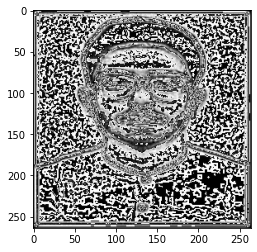

In [28]:
show_image(convolve_2D(Gaussian_img,mask))

### (v) Canny Edge Detection

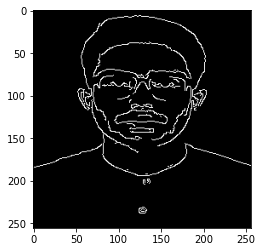

In [29]:
show_image(cv.Canny(gray,100,200))

### (vi) High-boost filtering

In [30]:
def highBoost(image,boost_factor):
    # Blur Kernel Matrix
    #   1/9 1/9 1/9
    #   1/9 1/9 1/9
    #   1/9 1/9 1/9
    
    resultant_image = image.copy()
    mask=[[1,1,1],[1,1,1],[1,1,1]]
    mask=np.array(mask)
    mask=mask/9
    blur_image=convolve_2D(gray,mask)
    resultant_image=boost_factor*image-blur_image[1:257,1:257]
    
    return resultant_image

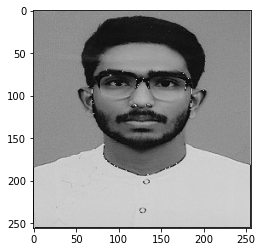

In [31]:
show_image(highBoost(gray,2))